# Bank Customer Clustering

## K-Mode Clustering

### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution.
Cluster customers on the basis of attributes.

Note: This python demonstration is for understanding the use of K-Modes clustering algorithm.

### Data
Only Categorical attributes of Bank Marketing Data Set(UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>) are used for demonstration.

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

## Data Reading and Understading

In [3]:
bank = pd.read_csv('bank_marketing.csv')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Importing Categorical Columns

In [8]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]

In [9]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,management,married,tertiary,no,yes,no,unknown,may,unknown
1,44,technician,single,secondary,no,yes,no,unknown,may,unknown
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,33,unknown,single,unknown,no,no,no,unknown,may,unknown


In [10]:
# Converting age into categorical variable.

In [11]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [12]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,management,married,tertiary,no,yes,no,unknown,may,unknown,50-60
1,technician,single,secondary,no,yes,no,unknown,may,unknown,40-50
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,30-40
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,40-50
4,unknown,single,unknown,no,no,no,unknown,may,unknown,30-40


## Data Inspection

In [13]:
bank_cust.shape

(45211, 10)

In [14]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,9
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,30-40
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,17687


In [15]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  object  
 1   marital    45211 non-null  object  
 2   education  45211 non-null  object  
 3   default    45211 non-null  object  
 4   housing    45211 non-null  object  
 5   loan       45211 non-null  object  
 6   contact    45211 non-null  object  
 7   month      45211 non-null  object  
 8   poutcome   45211 non-null  object  
 9   age_bin    45211 non-null  category
dtypes: category(1), object(9)
memory usage: 3.1+ MB


## Data Cleaning

In [16]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
age_bin      0.0
dtype: float64

In [17]:
# Data is clean.

### As it is just a demo for K-Modes we will skip EDA and jump straight to model building

## Model Building

In [18]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

### Data Preparation

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,4,1,2,0,1,0,2,8,3,4
1,9,2,1,0,1,0,2,8,3,3
2,2,1,1,0,1,1,2,8,3,2
3,1,1,3,0,1,0,2,8,3,3
4,11,2,3,0,0,0,2,8,3,2


In [22]:
# Importing Libraries

from kmodes.kmodes import KModes

## Using K-Mode with "Cao" initialization

In [23]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0


In [24]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [25]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [26]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin
0,1,1,1,0,1,0,0,8,3,2
1,4,2,2,0,0,0,0,1,3,3


## Using K-Mode with "Huang" initialization

In [27]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14624, cost: 166778.0
Run 1, iteration: 2/100, moves: 4480, cost: 164300.0
Run 1, iteration: 3/100, moves: 308, cost: 164300.0


In [28]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 1, 1, 0], dtype=uint16)

## Choosing K by comparing Cost against each K

In [29]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 186772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5896, cost: 152164.0
Run 1, iteration: 2/100, moves: 4805, cost: 152164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3764, cost: 149221.0


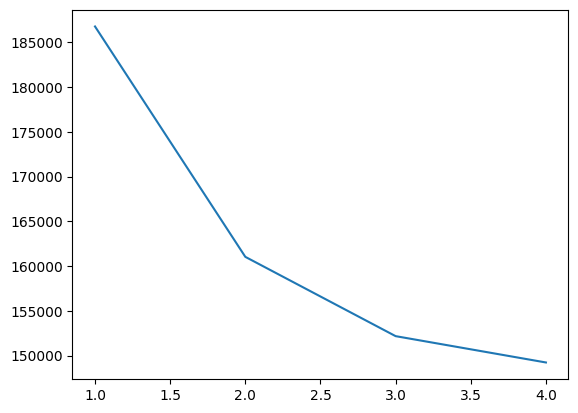

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [31]:
## Choosing K=2

In [32]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5793, cost: 161026.0
Run 1, iteration: 2/100, moves: 2118, cost: 161026.0


In [33]:
fitClusters_cao

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [34]:
bank_cust = bank_cust_copy.reset_index()

In [35]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [36]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,age_bin,cluster_predicted
0,management,married,tertiary,no,yes,no,unknown,may,unknown,50-60,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,40-50,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,30-40,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,40-50,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,30-40,0


### Cluster Identification

In [37]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [38]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32224 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                32224 non-null  object  
 1   marital            32224 non-null  object  
 2   education          32224 non-null  object  
 3   default            32224 non-null  object  
 4   housing            32224 non-null  object  
 5   loan               32224 non-null  object  
 6   contact            32224 non-null  object  
 7   month              32224 non-null  object  
 8   poutcome           32224 non-null  object  
 9   age_bin            32224 non-null  category
 10  cluster_predicted  32224 non-null  uint16  
dtypes: category(1), object(9), uint16(1)
memory usage: 2.6+ MB


In [39]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12987 entries, 6 to 45207
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                12987 non-null  object  
 1   marital            12987 non-null  object  
 2   education          12987 non-null  object  
 3   default            12987 non-null  object  
 4   housing            12987 non-null  object  
 5   loan               12987 non-null  object  
 6   contact            12987 non-null  object  
 7   month              12987 non-null  object  
 8   poutcome           12987 non-null  object  
 9   age_bin            12987 non-null  category
 10  cluster_predicted  12987 non-null  uint16  
dtypes: category(1), object(9), uint16(1)
memory usage: 1.0+ MB


In [40]:
# Job

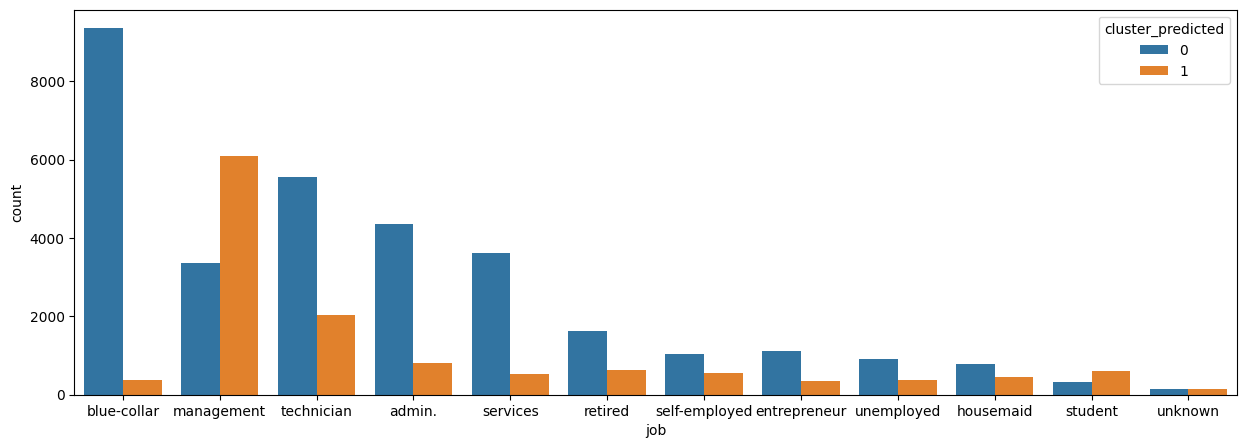

In [41]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [42]:
# Marital

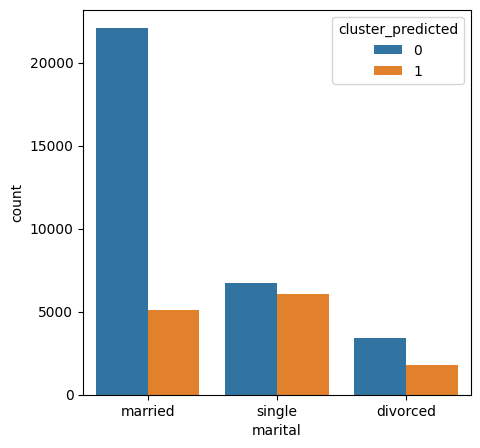

In [43]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [44]:
# Education

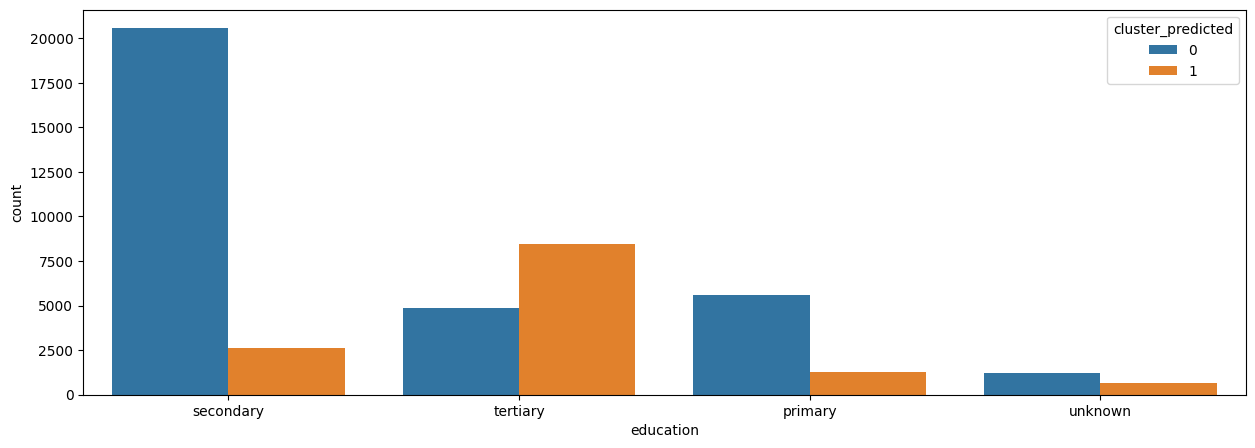

In [45]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [46]:
# Default

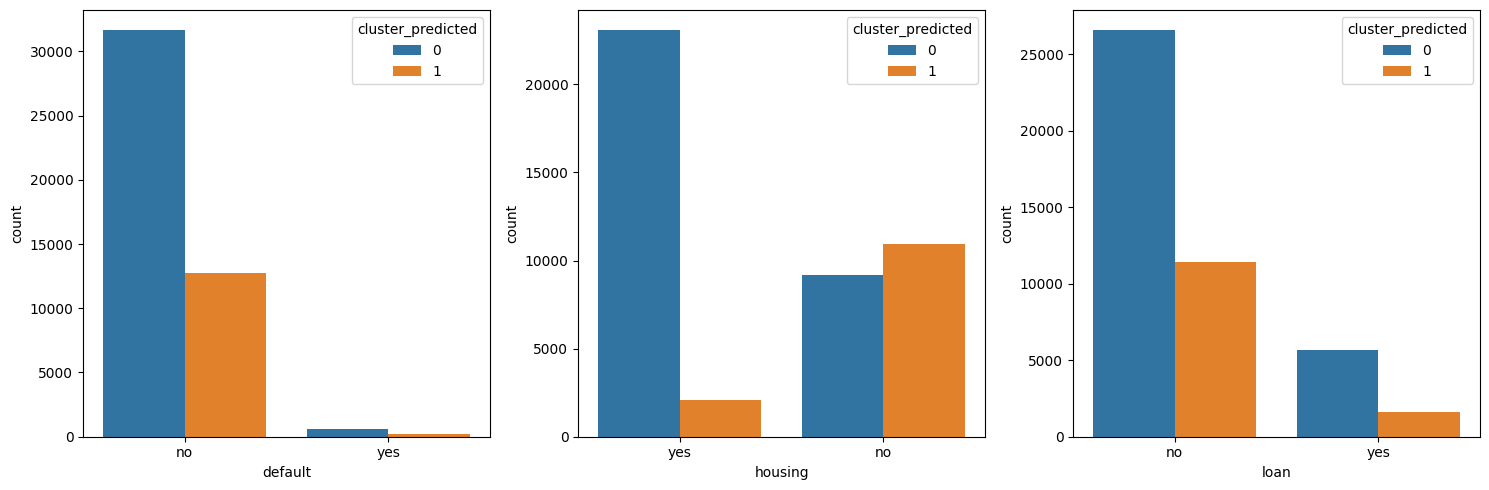

In [47]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

KeyError: 'day_of_week'

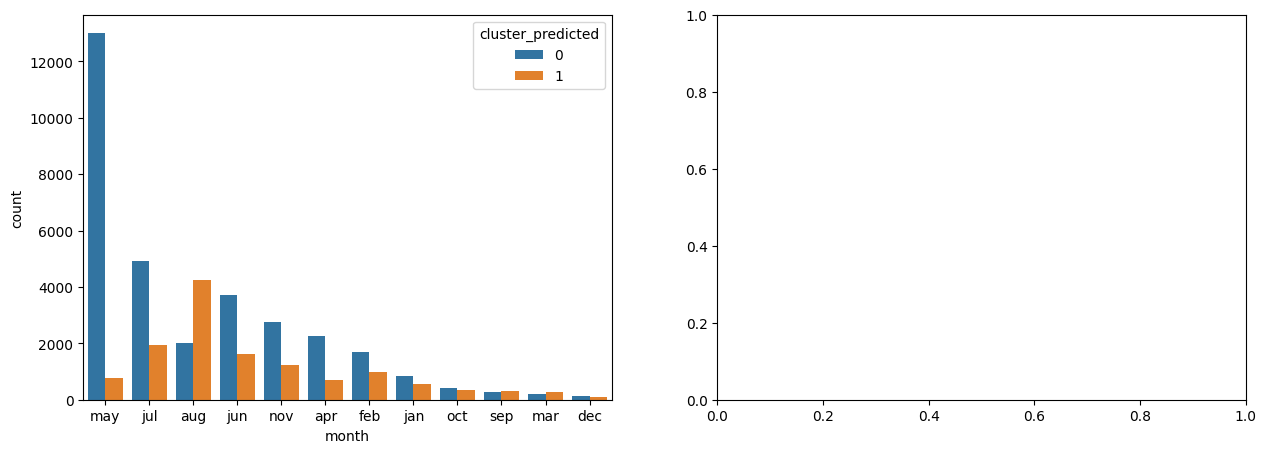

In [48]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

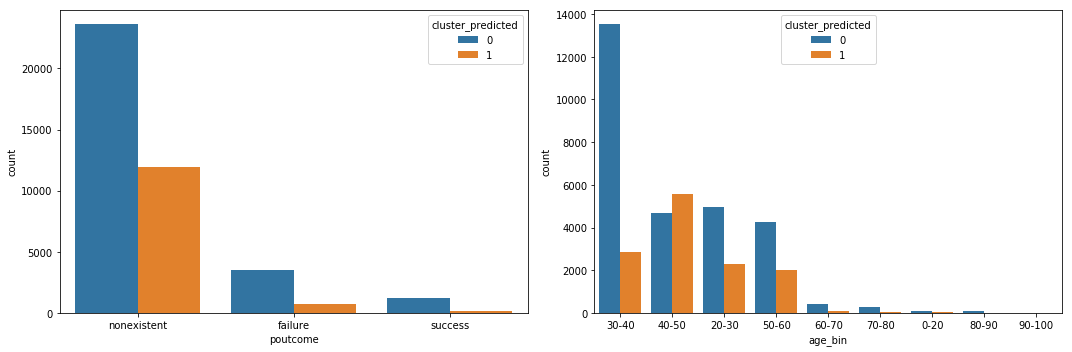

In [ ]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [ ]:
# Above visualization can help in identification of clusters.